In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from numpy.testing._private.utils import nulp_diff
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('../data/AID_data_all_PaDEL.csv').drop(['Unnamed: 0'], axis=1) 
data['PUBCHEM_ACTIVITY_OUTCOME'] = data['PUBCHEM_ACTIVITY_OUTCOME'].astype('category') 
data['PUBCHEM_ACTIVITY_OUTCOME'] = data['PUBCHEM_ACTIVITY_OUTCOME'].cat.codes 
data['PUBCHEM_ACTIVITY_OUTCOME'] = data['PUBCHEM_ACTIVITY_OUTCOME'].apply(lambda x: 1 if x == 0 else 0)
data = data.drop([ 'Smiles', 'PUBCHEM_CID'], axis=1) 
data

# Inactive = 0, Active = 1 

,PUBCHEM_ACTIVITY_OUTCOME,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160065,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160066,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160067,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160068,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data_active = data[data['PUBCHEM_ACTIVITY_OUTCOME']==1].reset_index(drop=True)
data_active

,PUBCHEM_ACTIVITY_OUTCOME,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
649,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
650,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data_inactive = data[data['PUBCHEM_ACTIVITY_OUTCOME']==0].reset_index(drop=True)
data_inactive

,PUBCHEM_ACTIVITY_OUTCOME,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159413,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159414,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159415,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159416,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Convert non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()
X = data.drop([ 'PUBCHEM_ACTIVITY_OUTCOME'], axis=1)
y = data['PUBCHEM_ACTIVITY_OUTCOME']

In [6]:
X = X.astype(float)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160065,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160066,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160067,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160068,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X.shape, y.shape

((160069, 881), (160069,))

### **` Apply SMOTE ==> `**
SMOTE for data generation from minority class. 

In [8]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to generate new data for the minority class
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = sm.fit_resample(X.astype(float), y)

In [9]:
X_res

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318829,1.0,1.0,0.351179,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318830,1.0,1.0,1.000000,0.91024,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318831,1.0,1.0,0.822378,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318832,1.0,1.0,1.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Apply lambda function to each element of the DataFrame
X_res = X_res.applymap(lambda x: 1 if x > 0.5 else 0)

In [16]:
X_res.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_res.value_counts()

0    159417
1    159417
Name: PUBCHEM_ACTIVITY_OUTCOME, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state = 123, stratify=y_res)

In [19]:
print(X_train.shape, X_test.shape)

(239125, 881) (79709, 881)


### **` Classifier: XGboosting ==> `**

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

y_pred_class = xgbc.predict(X_test) 

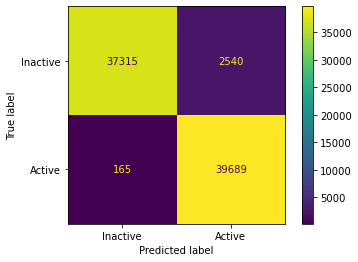

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     39855
           1       0.94      1.00      0.97     39854

    accuracy                           0.97     79709
   macro avg       0.97      0.97      0.97     79709
weighted avg       0.97      0.97      0.97     79709



In [23]:
cf_matrix = confusion_matrix(y_test , y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,  display_labels=['Inactive', 'Active'])
disp.plot(values_format='')
plt.show()

print(classification_report(y_test , y_pred_class))

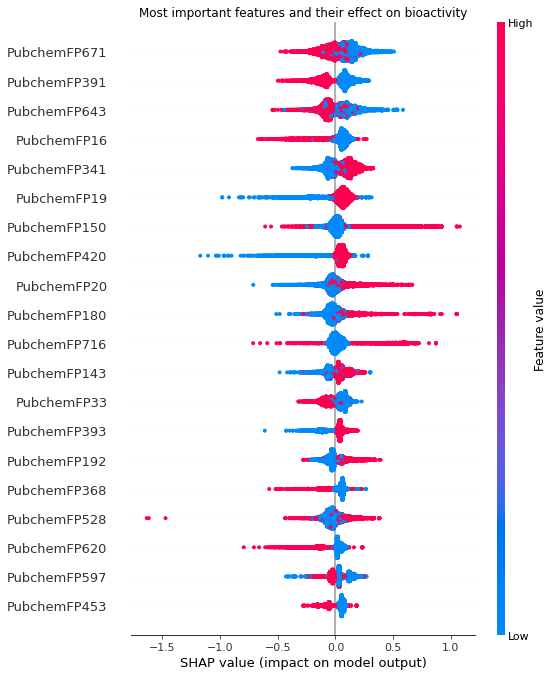

In [23]:
import warnings
warnings.filterwarnings('ignore') 
def explain_XGB_SHAP(clf, X, top_feature = 20):
    import shap
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X)
    plt.plot()
    plt.title("Most important features and their effect on bioactivity")
    shap.summary_plot(shap_values, X.astype("float"), max_display=top_feature) # shap_values[1] explains class 1 
    plt.show()
    return shap_values


shap = explain_XGB_SHAP(xgbc, X_test[:10000], 15)

In [64]:
data_2 = pd.read_csv('../data/ChEMBL_data_all_PaDEL.csv')
data_2 = data_2.drop([ 'molecule_chembl_id', 'canonical_smiles', 'standard_value'], axis=1) 
data_2['class'] = data_2['class'].astype('category')
data_2['class'] = data_2['class'].cat.codes 
data_2['class'] = data_2['class'].apply(lambda x: 1 if x == 0 else 0)

data_2

# Inactive = 0, Active = 1

,class,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
391,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **`Neural Network Model: `**

In [70]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D , MaxPool2D , Flatten , Dropout, concatenate, Concatenate, Add
import tensorflow as tf

In [71]:
X_train_np = np.asarray(X_train).astype(np.float32) 

X_test_np = np.asarray(X_test).astype(np.float32) 

In [72]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
def prepare_targets(y_train, y_test):
	y_train_enc = np_utils.to_categorical(y_train)
	y_test_enc = np_utils.to_categorical(y_test)
	return y_train_enc, y_test_enc

y_train_enc, y_test_enc = prepare_targets(y_train, y_test)


In [73]:
def baseModel1(input_data):
  hidden1 = Input(shape=input_data.shape[1])
  hidden3 = Dense(2048, activation='relu')(hidden1)
  hidden3 = Dropout(0.5)(hidden3)
  hidden3 = Dense(4096, activation='relu')(hidden3)
  hidden3 = Dropout(0.2)(hidden3)
  hidden3 = Dense(1024, activation='relu')(hidden3)
  #hidden3 = Dropout(0.2)(hidden3)
  hidden3 = Dense(512, activation='relu')(hidden3)
  #hidden3 = Dropout(0.2)(hidden3)
  hidden3 = Dense(256, activation='relu')(hidden3)
  hidden3 = Dense(128, activation='relu')(hidden3)
  x = Dense(2, activation='softmax')(hidden3)
  model = Model(inputs=hidden1, outputs=x)
  return model

In [74]:
model = baseModel1(X_train)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 881)]             0         
                                                                 
 dense (Dense)               (None, 2048)              1806336   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              8392704   
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              4195328   
                                                                 
 dense_3 (Dense)             (None, 512)               524800

In [80]:
opt = tf.keras.optimizers.Adam()

model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
	)

In [81]:
callback_list = [ #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15),
                  tf.keras.callbacks.ModelCheckpoint(filepath='saved_model/model.{epoch:02d}-{val_accuracy:.2f}.h5', save_best_only=True),
                  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]


### **`Train the neural network ==>`**

In [82]:


history = model.fit(X_train_np, y_train_enc, 
                    validation_split=0.2,
                    epochs=20, 
                    verbose="auto",
                    batch_size = 128,
                    callbacks=callback_list
                    
                    )


Epoch 1/20
1495/1495 [==============================] - 113s 75ms/step - loss: 0.2176 - accuracy: 0.9135 - val_loss: 0.0766 - val_accuracy: 0.9764
Epoch 2/20
1495/1495 [==============================] - 116s 78ms/step - loss: 0.1427 - accuracy: 0.9466 - val_loss: 0.0611 - val_accuracy: 0.9853
Epoch 3/20
1495/1495 [==============================] - 118s 79ms/step - loss: 0.1138 - accuracy: 0.9586 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 4/20
1495/1495 [==============================] - 116s 78ms/step - loss: 0.0940 - accuracy: 0.9663 - val_loss: 0.0341 - val_accuracy: 0.9915
Epoch 5/20
1495/1495 [==============================] - 116s 78ms/step - loss: 0.0808 - accuracy: 0.9722 - val_loss: 0.0278 - val_accuracy: 0.9927
Epoch 6/20
1495/1495 [==============================] - 114s 76ms/step - loss: 0.0726 - accuracy: 0.9753 - val_loss: 0.0289 - val_accuracy: 0.9933
Epoch 7/20
1495/1495 [==============================] - 111s 74ms/step - loss: 0.0635 - accuracy: 0.9790 - val_loss: 0

### **` Load pretrained model ==> `**

In [46]:
loaded_2 = tf.keras.models.load_model("saved_model/model.20-1.00.h5")
#loaded_2 = model

y_pred =  np.argmax(loaded_2.predict(X_test), axis=1) 
y_test_class = np.argmax(y_test_enc, axis=1)

cf_matrix = confusion_matrix(y_test_class , y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,  display_labels=['Inactive', 'Active'])
disp.plot(values_format='') 
plt.show() 

print(classification_report(y_test_class , y_pred))

2023-01-29 18:53:48.609409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


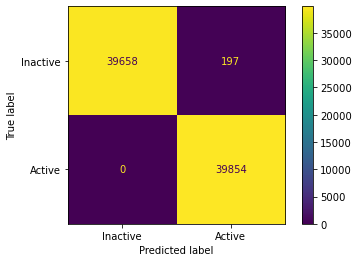

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39855
           1       1.00      1.00      1.00     39854

    accuracy                           1.00     79709
   macro avg       1.00      1.00      1.00     79709
weighted avg       1.00      1.00      1.00     79709



In [51]:
from numpy.testing._private.utils import nulp_diff
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test_class , y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,  display_labels=['Inactive', 'Active'])
disp.plot(values_format='') 
plt.show() 

print(classification_report(y_test_class , y_pred_class))


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


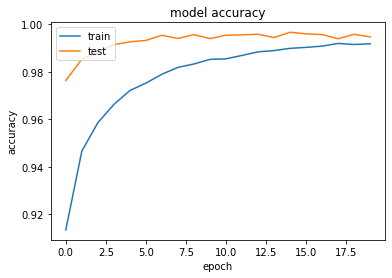

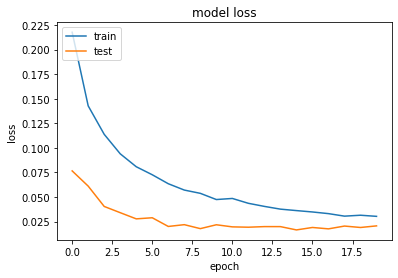

In [83]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()